In [1]:
from xcube_cmems.store import CmemsDataStore
import os

### set cmems username and password to be environment variables `$CMEMS_USERNAME` and `$CMEMS_PASSWORD`

In [4]:
cmems_store =  CmemsDataStore()

### Get all opendap dataset ids for CMEMS API

In [5]:
list(cmems_store.get_data_ids())

['cmems_obs-si_ant_physic_my_drift-amsr_P2D',
 'cmems_obs-si_ant_physic_my_drift-amsr_P3D',
 'BAS-ANT-SEAICE_TYPE-L4-NRT-OBS',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1M-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1M',
 'cmems_mod_arc_bgc_my_ecosmo_P1Y',
 'cmems_obs-oc_arc_bgc-plankton_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-plankton_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-reflectance_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-reflectance_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-transp_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-transp_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-optics_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-optics_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-reflectance_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-reflectance_my_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-t

In [7]:
cmems_store.get_data_opener_ids()

('dataset:zarr:cmems',)

In [9]:
data_des = cmems_store.describe_data('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i')

In [10]:
data_des.time_range

('2020-01-01', '2023-02-13')

In [11]:
data_des.bbox

(-180.041666625, -80.041666625, 179.95833329166663, 90.041666625)

### Open a dataset without cube params

In [12]:
ds = cmems_store.open_data('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i','dataset:zarr:cmems')
ds

<xarray.Dataset>
Dimensions:    (time: 9112, latitude: 2041, longitude: 4320)
Coordinates:
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * time       (time) datetime64[ns] 2020-01-01T03:00:00 ... 2023-02-13
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VHM0_SW1   (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VHM0_SW2   (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VHM0_WW    (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VMDR       (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VMDR_SW1   (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VTM01_SW2  (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VTM01_WW   (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VTM02      (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VTM10      (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    VTPK       (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
Attributes: (12/22)
    Conventions:           CF-1.6
    time_coverage_start:   20230212-03:00:00
    time_coverage_end:     20230213-00:00:00
    date_created:          20230203-07:43:00
    product_type:          forecast
    product:               GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                    ...
    geospatial_lon_step:   0.08332825
    geospatial_lon_units:  degree
    geospatial_lat_min:    -80.0
    geospatial_lat_max:    90.0
    geospatial_lat_step:   0.08333588
    geospatial_lat_units:  degree

In [13]:
ds.VHM0

<xarray.DataArray 'VHM0' (time: 9112, latitude: 2041, longitude: 4320)>
dask.array<open_dataset-b2f731d6c017ac043f8915994915b73eVHM0, shape=(9112, 2041, 4320), dtype=float32, chunksize=(1, 681, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * time       (time) datetime64[ns] 2020-01-01T03:00:00 ... 2023-02-13
Attributes:
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    units:             m
    cell_methods:      time:point area:mean
    type_of_analysis:  spectral analysis
    WMO_code:          100

In [14]:
ds.VTPK

<xarray.DataArray 'VTPK' (time: 9112, latitude: 2041, longitude: 4320)>
dask.array<open_dataset-b2f731d6c017ac043f8915994915b73eVTPK, shape=(9112, 2041, 4320), dtype=float32, chunksize=(1, 681, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * time       (time) datetime64[ns] 2020-01-01T03:00:00 ... 2023-02-13
Attributes:
    standard_name:     sea_surface_wave_period_at_variance_spectral_density_m...
    long_name:         Wave period at spectral peak / peak period (Tp)
    units:             s
    cell_methods:      time:point area:mean
    type_of_analysis:  spectral analysis
    WMO_code:          204

### Open dataset with a single variable and time range

In [15]:
ds = cmems_store.open_data('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i','dataset:zarr:cmems',variable_names=['VMDR'],time_range=('2022-01-01','2022-01-05'))
ds

<xarray.Dataset>
Dimensions:    (time: 40, latitude: 2041, longitude: 4320)
Coordinates:
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-05T21:00:00
Data variables:
    VMDR       (time, latitude, longitude) float32 dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
Attributes: (12/22)
    Conventions:           CF-1.6
    time_coverage_start:   20230212-03:00:00
    time_coverage_end:     20230213-00:00:00
    date_created:          20230203-07:43:00
    product_type:          forecast
    product:               GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                    ...
    geospatial_lon_step:   0.08332825
    geospatial_lon_units:  degree
    geospatial_lat_min:    -80.0
    geospatial_lat_max:    90.0
    geospatial_lat_step:   0.08333588
    geospatial_lat_units:  degree

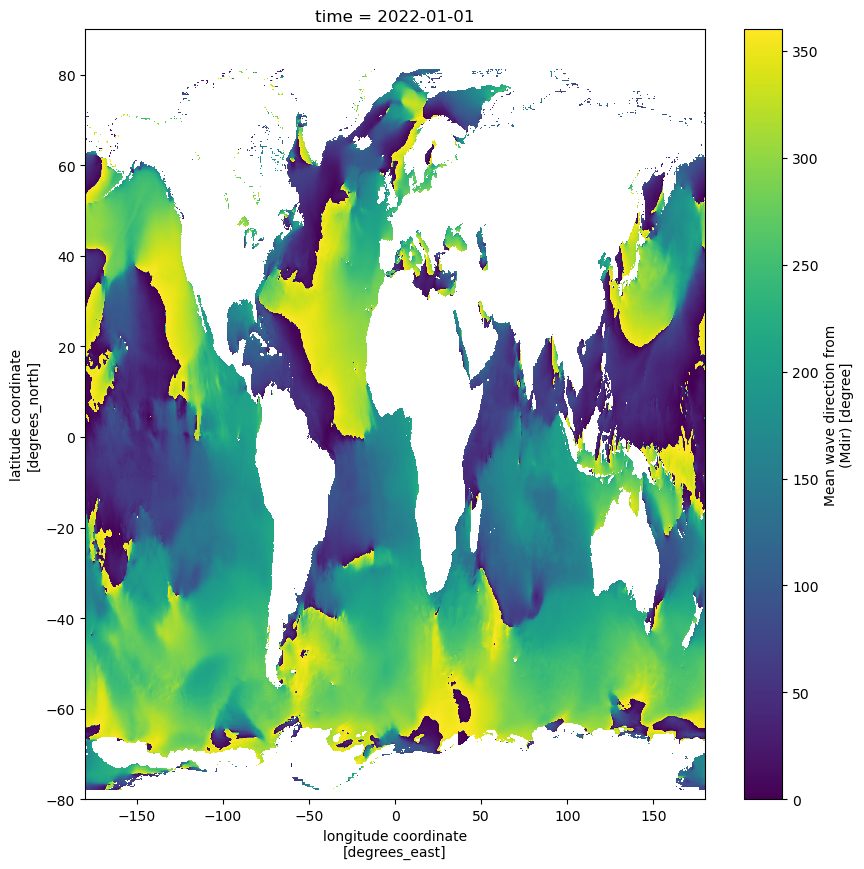

In [16]:
ds.VMDR[0].plot(figsize=(10, 10))

### Open a dataset with cube params

In [17]:
cmems_store.get_open_data_params_schema('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i','dataset:zarr:cmems')

In [18]:
cmems_store.get_data_types_for_data('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i')

('dataset',)

In [19]:
ds = cmems_store.open_data('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i','dataset:zarr:cmems',variable_names=['VMDR'],time_range=('2022-01-01','2022-01-05'),
                            bbox=[9, 53, 20, 62])
ds

<xarray.Dataset>
Dimensions:    (time: 40, latitude: 109, longitude: 133)
Coordinates:
  * latitude   (latitude) float64 53.0 53.08 53.17 53.25 ... 61.83 61.92 62.0
  * longitude  (longitude) float64 9.0 9.083 9.167 9.25 ... 19.83 19.92 20.0
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-05T21:00:00
Data variables:
    VMDR       (time, latitude, longitude) float32 dask.array<chunksize=(1, 109, 133), meta=np.ndarray>
Attributes: (12/22)
    Conventions:           CF-1.6
    time_coverage_start:   20230212-03:00:00
    time_coverage_end:     20230213-00:00:00
    date_created:          20230203-07:43:00
    product_type:          forecast
    product:               GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                    ...
    geospatial_lon_step:   0.08332825
    geospatial_lon_units:  degree
    geospatial_lat_min:    -80.0
    geospatial_lat_max:    90.0
    geospatial_lat_step:   0.08333588
    geospatial_lat_units:  degree

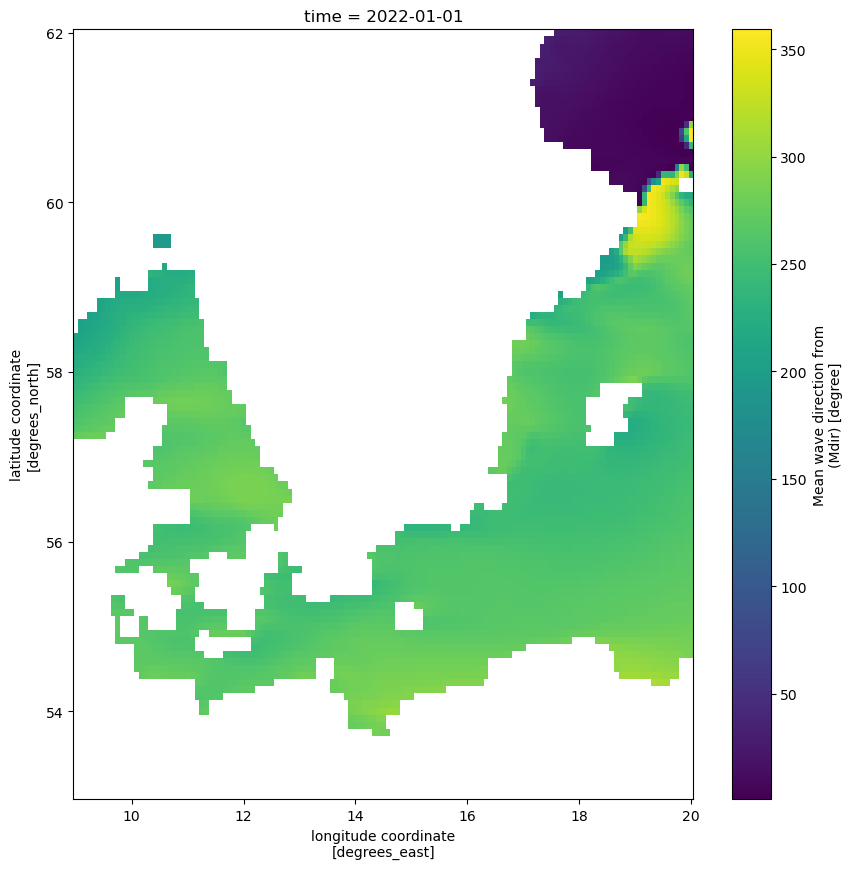

In [20]:
ds.VMDR[0].plot(figsize=(10, 10))

In [38]:
ds = cmems_store.open_data('SST_MED_SST_L3S_NRT_OBSERVATIONS_010_012_a','dataset:zarr:cmems',variable_names=['sea_surface_temperature'],time_range=('2022-01-01','2022-01-02'), bbox=[18, 40, 20, 46])
ds

<xarray.Dataset>
Dimensions:                  (time: 2, lat: 97, lon: 33)
Coordinates:
  * lat                      (lat) float32 40.0 40.06 40.12 ... 45.88 45.94 46.0
  * lon                      (lon) float32 18.0 18.06 18.12 ... 19.88 19.94 20.0
  * time                     (time) datetime64[ns] 2022-01-01 2022-01-02
Data variables:
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(2, 97, 33), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                CF-1.4
    title:                      Mediterranean SST, L3S, 1/16deg daily (SST_ME...
    summary:                    The MED CNR Sea Surface Temperature L3S produ...
    references:                 Buongiorno Nardelli, B., C. Tronconi, a. Pisa...
    institution:                GOS
    history:                    GOS-MYO processor V3: new version
    ...                         ...
    publisher_url:              http://marine.copernicus.eu/
    publisher_email:            servicedesk.cmems@mercator-ocean.eu, gsdk@art...
    processing_level:           L3
    cdm_data_type:              grid
    Citation:                    
    distribution_statement:     See Copernicus Marine Service Data License